In [3]:
! pip3 install -r requirements.txt

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     |████████████████████████████████| 503 kB 1.9 MB/s            
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


/home/psaghelyi/.linuxbrew/opt/python@3.9/lib/python3.9/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'psaghelyi.ddns.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/home/psaghelyi/.linuxbrew/opt/python@3.9/lib/python3.9/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'psaghelyi.ddns.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/home/psaghelyi/.linuxbrew/opt/python@3.9/lib/python3.9/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'psaghelyi.ddns.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#s

5

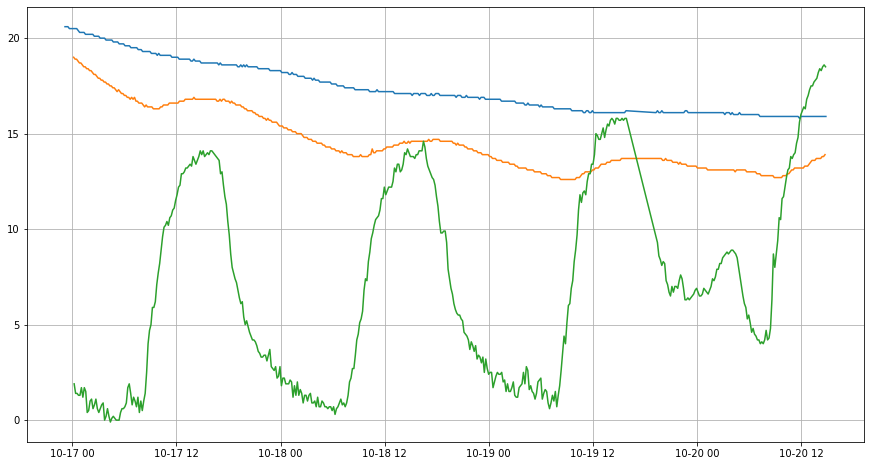

In [4]:
import requests
import datetime
import pytz
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib widget

LIMIT=500

tz = pytz.timezone("Europe/Budapest")

fig, ax = plt.subplots(figsize=(15, 8))

response = requests.get(f"https://psaghelyi.ddns.net:12345/sensor/s1?limit=-{LIMIT}", verify=False)
j = response.json()
x1 = [datetime.datetime.fromtimestamp(i['epoch'], tz) for i in j]
y1 = [i['data']['temperature'] for i in j]

response = requests.get(f"https://psaghelyi.ddns.net:12345/sensor/s2?limit=-{LIMIT}", verify=False)
j = response.json()
x2 = [datetime.datetime.fromtimestamp(i['epoch'], tz) for i in j]
y2 = [i['data']['temperature'] for i in j]

response = requests.get(f"https://psaghelyi.ddns.net:12345/sensor/s3?limit=-{LIMIT}", verify=False)
j = response.json()
x3 = [datetime.datetime.fromtimestamp(i['epoch'], tz) for i in j]
y3 = [i['data']['temperature'] for i in j]


ax.plot(x1,y1)
ax.plot(x2,y2)
ax.plot(x3,y3)
ax.grid(True)

# annotation
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points")
annot.set_visible(False)

def hover(event):
    # get the points contained in the event
    cont, ind = ax.contains(event)
    if cont:
        # change annotation position
        annot.xy = (event.xdata, event.ydata)
        # write the name of every point contained in the event
        annot.set_text("annot")
        annot.set_visible(True)    
    else:
        annot.set_visible(False)
    
fig.canvas.mpl_connect("motion_notify_event", hover)



/home/psaghelyi/.linuxbrew/opt/python@3.9/lib/python3.9/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'psaghelyi.ddns.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/home/psaghelyi/.linuxbrew/opt/python@3.9/lib/python3.9/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'psaghelyi.ddns.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/home/psaghelyi/.linuxbrew/opt/python@3.9/lib/python3.9/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'psaghelyi.ddns.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#s

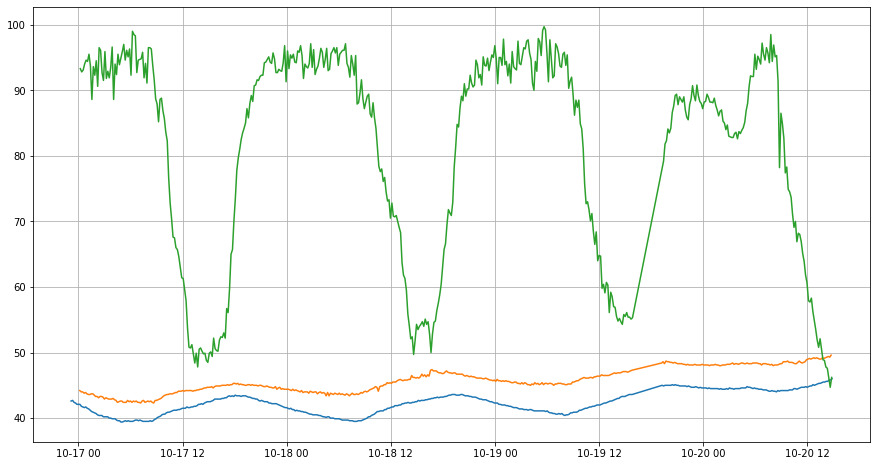

In [5]:
import requests
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

LIMIT=500

fig, ax = plt.subplots(figsize=(15, 8))

response = requests.get(f"https://psaghelyi.ddns.net:12345/sensor/s1?limit=-{LIMIT}", verify=False)
j = response.json()
x1 = [datetime.datetime.fromtimestamp(i['epoch']) for i in j]
y1 = [i['data']['humidity'] for i in j]

response = requests.get(f"https://psaghelyi.ddns.net:12345/sensor/s2?limit=-{LIMIT}", verify=False)
j = response.json()
x2 = [datetime.datetime.fromtimestamp(i['epoch']) for i in j]
y2 = [i['data']['humidity'] for i in j]

response = requests.get(f"https://psaghelyi.ddns.net:12345/sensor/s3?limit=-{LIMIT}", verify=False)
j = response.json()
x3 = [datetime.datetime.fromtimestamp(i['epoch']) for i in j]
y3 = [i['data']['humidity'] for i in j]


ax.plot(x1,y1)
ax.plot(x2,y2)
ax.plot(x3,y3)
ax.grid(True)
